In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

from statsmodels.tsa.api import Holt

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Kaustubh Vaibhav\Advance Analystics\Datasets\FRED-NROUST.csv")
df

,Date,Value
0,01-01-1949,5.255053
1,01-04-1949,5.261516
2,01-07-1949,5.268013
3,01-10-1949,5.274564
4,01-01-1950,5.281182
...,...,...
291,01-10-2021,4.450651
292,01-01-2022,4.445137
293,01-04-2022,4.440214
294,01-07-2022,4.435784


In [3]:
# PArtitioning of data
y = df['Value']
y_train = df['Value'][:-8]
y_test = df['Value'][-8:]

In [4]:
print(y_test)

288    4.471833
289    4.463892
290    4.456865
291    4.450651
292    4.445137
293    4.440214
294    4.435784
295    4.431760
Name: Value, dtype: float64


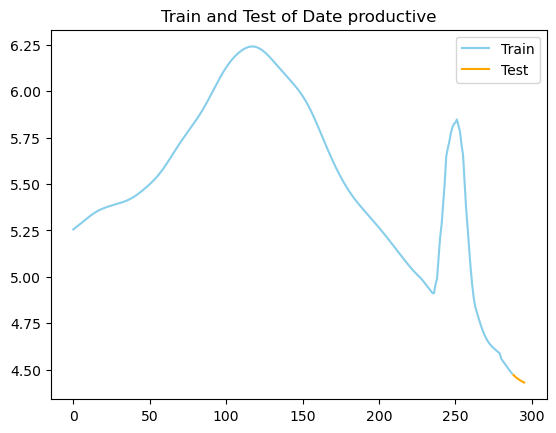

In [5]:
plt.plot(y_train, color = 'skyblue', label = 'Train')
plt.plot(y_test, color = 'orange', label = 'Test')
plt.legend(loc = 'best')
plt.title("Train and Test of Date productive")
plt.show()

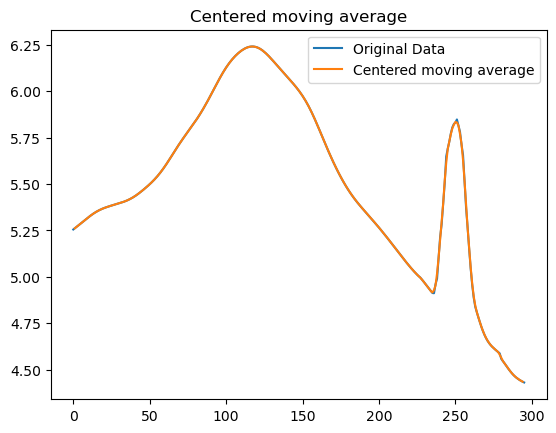

In [6]:
# Centered MA
# here 3 shows the span 
fcast = y.rolling(3, center = True).mean()
plt.plot(y, label = 'Original Data')
plt.plot(fcast, label = 'Centered moving average')
plt.legend(loc = 'best')
plt.title("Centered moving average")
plt.show()


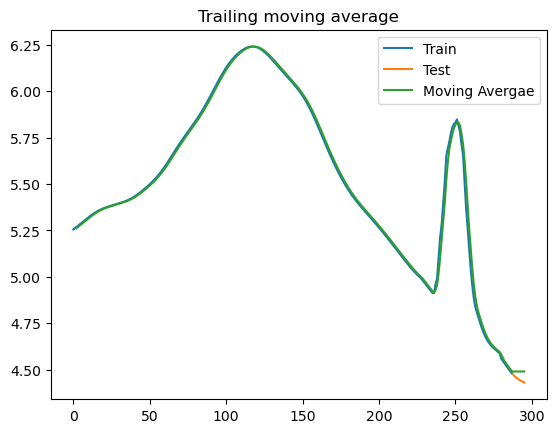

In [7]:
# Trailing MA
# span 3 is used
span = 3
fcast = y_train.rolling(span).mean()
last_val = fcast.iloc[-1]
MA_series = pd.Series(last_val.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index = True)
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(MA_fcast, label = 'Moving Avergae')
plt.legend(loc = 'best')
plt.title("Trailing moving average")
plt.show()

In [8]:
# evaluating span = 3
rmse = np.sqrt(mean_squared_error(y_test, MA_series))
print("RMSE = ", rmse)

RMSE =  0.04344952103431172


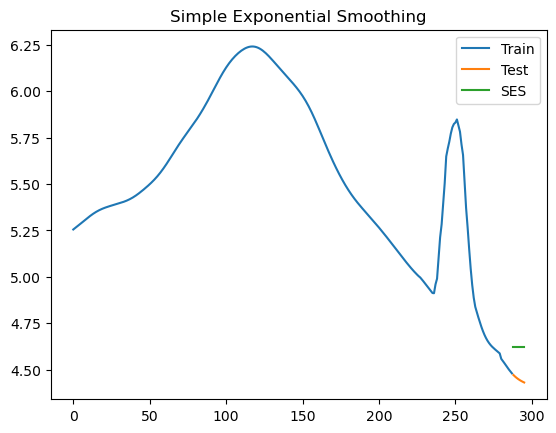

In [9]:
# Simple Exponential Smoothing
alpha = 0.1
fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast1, label = 'SES')
plt.legend(loc = 'best')
plt.title("Simple Exponential Smoothing")
plt.show()

In [10]:
# EVALUATING..
# lower rmse is preferred, as it signifies the error

rmse = np.sqrt(mean_squared_error(y_test, fcast1))
print("RMSE = ", rmse)

RMSE =  0.1712568505665867


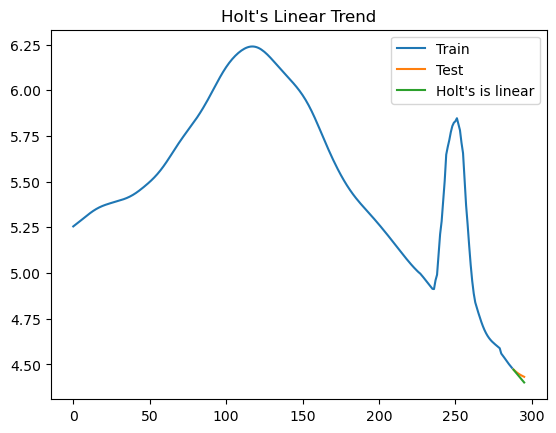

In [27]:
# Holt's Linear Trend
alpha = 0.1
beta = 0.9
fit2 = Holt(y_train).fit()
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's is linear")
plt.legend(loc = 'best')
plt.title("Holt's Linear Trend")
plt.show()


In [28]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  0.017038778550677702


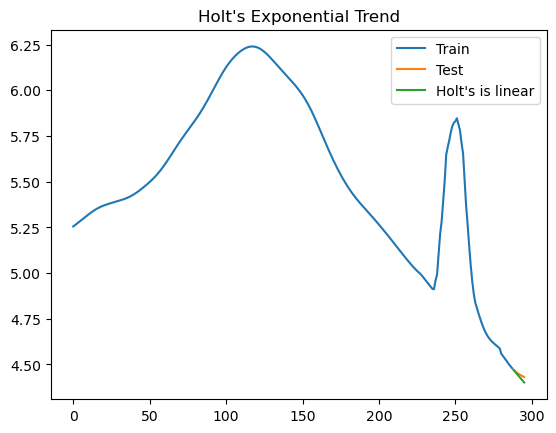

In [29]:
# Holt's Exponential trend
alpha = 0.1
beta = 0.8
fit2 = Holt(y_train, exponential = True).fit()
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's is linear")
plt.legend(loc = 'best')
plt.title("Holt's Exponential Trend")
plt.show()


In [30]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)


RMSE =  0.016618469656492194


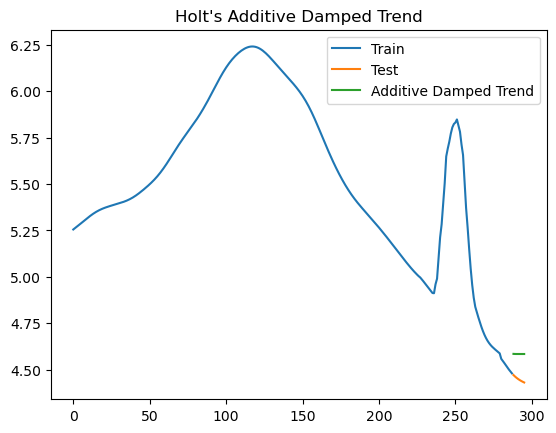

In [15]:
# Holt's Additive Trend
alpha=0.1
beta=0.8
phi=0.2
fit2 = Holt(y_train,damped_trend=True).fit(smoothing_level=alpha,
                         smoothing_trend=beta,
                         damping_trend=phi)
fcast2 = fit2.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast2, label="Additive Damped Trend")
plt.legend(loc='best')
plt.title("Holt's Additive Damped Trend")
plt.show()

In [16]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  0.13619787626089744


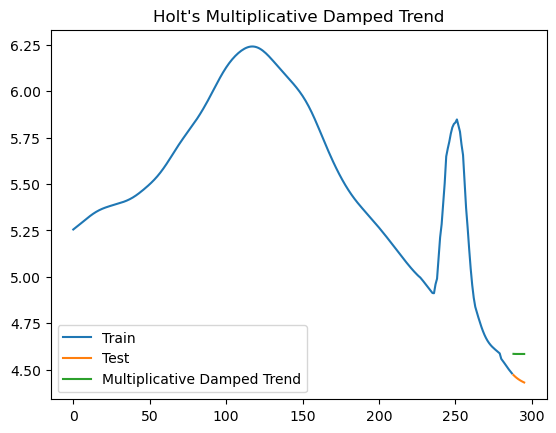

In [17]:
# Holt's Multiplicative Trend
alpha=0.1
beta=0.8
phi=0.2
fit2 = Holt(y_train,damped_trend=True,exponential=True).fit(smoothing_level=alpha,
                         smoothing_trend=beta,
                         damping_trend=phi)
fcast2 = fit2.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast2, label="Multiplicative Damped Trend")
plt.legend(loc='best')
plt.title("Holt's Multiplicative Damped Trend")
plt.show()

In [18]:
#### Evaluating
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE =",rmse)

RMSE = 0.13632995882020366


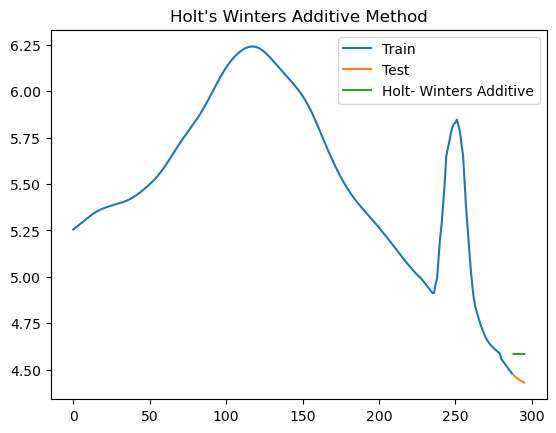

In [19]:
# Holt- Winters Additive
alpha = 0.1
beta = 0.8
gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 4,
                           trend = 'add', seasonal = 'add').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt- Winters Additive")
plt.legend(loc = 'best')
plt.title("Holt's Winters Additive Method")
plt.show()

In [20]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  0.033639328467556934


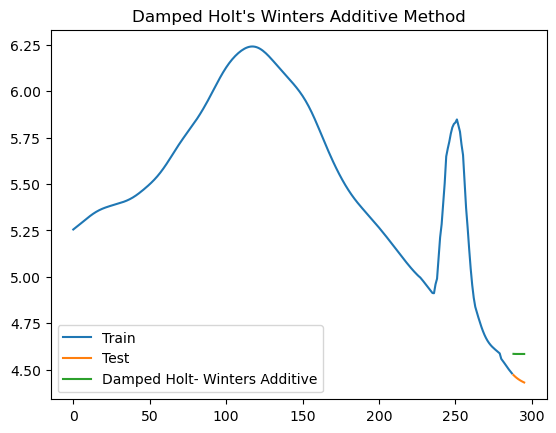

In [21]:
# Damped Holts Winters Multiplicative
alpha = 0.1
beta = 0.8
gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 4, damped_trend = True,
                           trend = 'add', seasonal = 'mul').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Damped Holt- Winters Additive")
plt.legend(loc = 'best')
plt.title("Damped Holt's Winters Additive Method")
plt.show()

In [22]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  0.01597463598616033
